<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/09%20compare_moex_etf.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

Статья [Обзор индексных фондов российских акций 2021](https://rostsber.ru/publish/stocks/index_fund_review_2021.html) на блоге "Рост Сбережений"

In [ ]:
!pip install okama

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

Содержание:

- Сравнение ОПИФ на индекс Мосбиржи
- Сравнение БПИФ и ETF на индекс Мосбиржи

In [19]:
pif = ['MCFTR.INDX',
      '0295-74549871.PIF',
#       '0662-94119196.PIF', Alltek - Birzhevoy indeks aktsiy (Alltek)
#       '0695-94121916.PIF', Alʹfa–Kapital Indeks MosBirzhi (Alʹfa-Kapital)
      '0177-71671092.PIF',
#       '1149-94139555.PIF', Ingosstrah (стал активным фондом)
#       '0890-94127385.PIF', Otkrytiye – Indeks MosBirzhi (OTKRYTIYe)
#       '0983-94131725.PIF', Rayffayzen – Indeks MMVB golubykh fishek (Rayffayzen Kapital)
      '0351-76578546.PIF',
     ]

In [20]:
etf_full = [
    'MCFTR.INDX',
    'FXRL.MOEX',
    'RUSE.MOEX',
    'SBMX.MOEX',
    'VTBX.MOEX',
    'TMOS.MOEX',
#     'RCMX.MOEX', # Райффайзен - Индекс МосБиржи полной доходности 15
#     'OPNR.MOEX', # Открытие Индекс Мосбиржи 15
]

## Сравнение индексных фондов российских акций

In [21]:
x = ok.AssetList(pif, ccy='RUB')
x

symbols          [MCFTR.INDX, 0295-74549871.PIF, 0177-71671092....
currency                                                       RUB
first date                                                 2005-06
last_date                                                  2021-08
period length                                   16 years, 3 months
inflation                                                 RUB.INFL
dtype: object

In [22]:
x.assets_first_dates

{'RUB': Timestamp('1992-08-01 00:00:00'),
 'MCFTR.INDX': Timestamp('2003-03-01 00:00:00'),
 '0177-71671092.PIF': Timestamp('2004-06-01 00:00:00'),
 '0295-74549871.PIF': Timestamp('2005-04-01 00:00:00'),
 '0351-76578546.PIF': Timestamp('2005-06-01 00:00:00'),
 'RUB.INFL': Timestamp('2005-06-01 00:00:00')}

In [6]:
x.names

{'MCFTR.INDX': 'MOEX Total Return',
 '0295-74549871.PIF': 'AK BARS Indeksnyy (AK BARS KAPITAL)',
 '0177-71671092.PIF': 'VTB - Indeks MosBirzhi (VTB Kapital Upravleniye aktivami)',
 '1149-94139555.PIF': 'Ingosstrakh Indeks MosBirzhi (Ingosstrakh - Investitsii)',
 '0351-76578546.PIF': 'Solid - Indeks MosBirzhi (SOLID Menedzhment)'}

In [23]:
lg1 = list(x.names.values())

In [24]:
lg1

['MOEX Total Return',
 'AK BARS Indeksnyy (AK BARS KAPITAL)',
 'VTB - Indeks MosBirzhi (VTB Kapital Upravleniye aktivami)',
 'Solid - Indeks MosBirzhi (SOLID Menedzhment)']

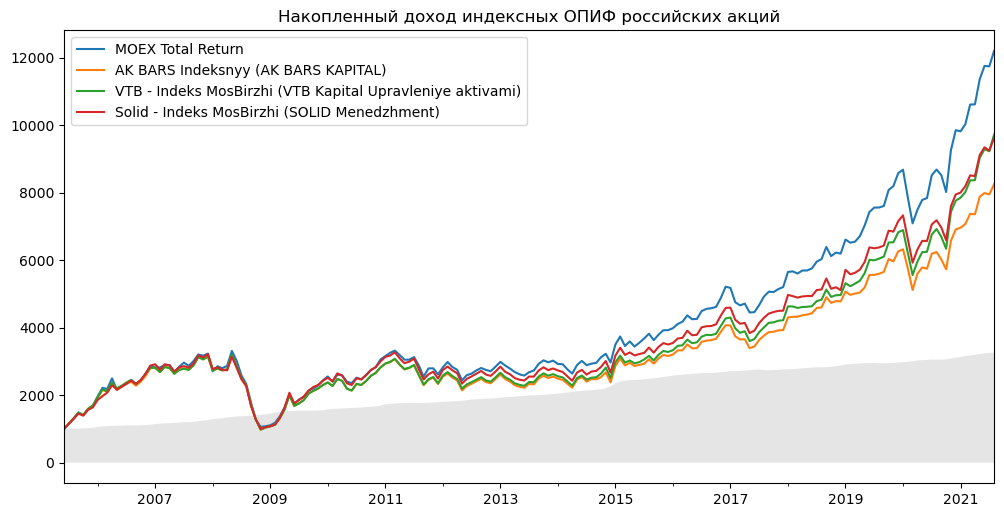

In [41]:
x.wealth_indexes.iloc[:, :-1].plot()
plt.fill_between(x.wealth_indexes.index.to_timestamp(), 0, x.wealth_indexes['RUB.INFL'], facecolor='grey', alpha=0.2)
plt.legend(lg1)
plt.title('Накопленный доход индексных ОПИФ российских акций');

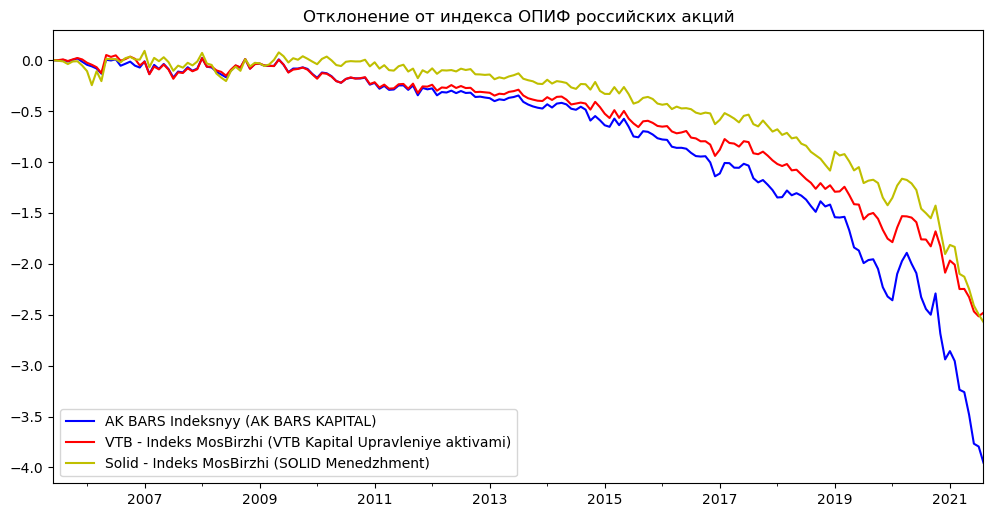

In [42]:
x.tracking_difference.plot(color=['b', 'r', 'y'])
plt.legend(lg1[1:])
plt.title('Отклонение от индекса ОПИФ российских акций');

In [46]:
x.tracking_difference.tail(5)

,0295-74549871.PIF,0177-71671092.PIF,0351-76578546.PIF
2021-04,-3.260381,-2.246711,-2.126677
2021-05,-3.482311,-2.327180,-2.247732
2021-06,-3.767076,-2.467573,-2.410504
2021-07,-3.794895,-2.515955,-2.497587
2021-08,-3.953610,-2.479586,-2.572124


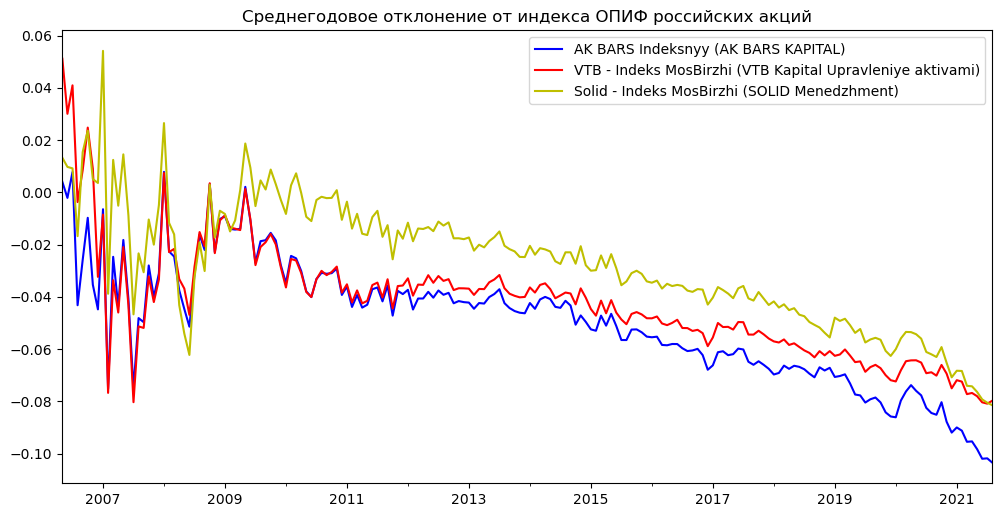

In [47]:
x.tracking_difference_annualized.plot(color=['b', 'r', 'y'])
plt.legend(lg1[1:])
plt.title('Среднегодовое отклонение от индекса ОПИФ российских акций');

In [51]:
x.tracking_difference_annualized.iloc[-1, :]

0295-74549871.PIF   -0.103480
0177-71671092.PIF   -0.079754
0351-76578546.PIF   -0.081499
Name: 2021-08, dtype: float64

In [52]:
x5 = ok.AssetList(pif, ccy='RUB', first_date='2016-09')
x5

symbols          [MCFTR.INDX, 0295-74549871.PIF, 0177-71671092....
currency                                                       RUB
first date                                                 2016-09
last_date                                                  2021-08
period length                                    5 years, 0 months
inflation                                                 RUB.INFL
dtype: object

In [53]:
x5.tracking_difference_annualized.iloc[-1, :]

0295-74549871.PIF   -0.069009
0177-71671092.PIF   -0.021390
0351-76578546.PIF   -0.053105
Name: 2021-08, dtype: float64

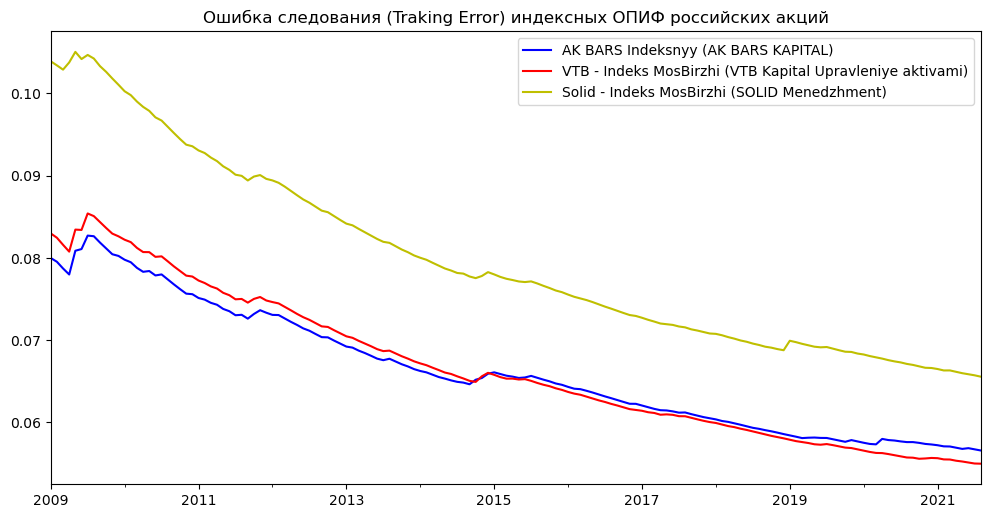

In [56]:
x.tracking_error['2009-01':].plot(color=['b', 'r', 'y'])
plt.legend(lg1[1:])
plt.title('Ошибка следования (Traking Error) индексных ОПИФ российских акций');

In [59]:
x.tracking_error.iloc[-1, :]

0295-74549871.PIF    0.056552
0177-71671092.PIF    0.054945
0351-76578546.PIF    0.065535
Name: 2021-08, dtype: float64

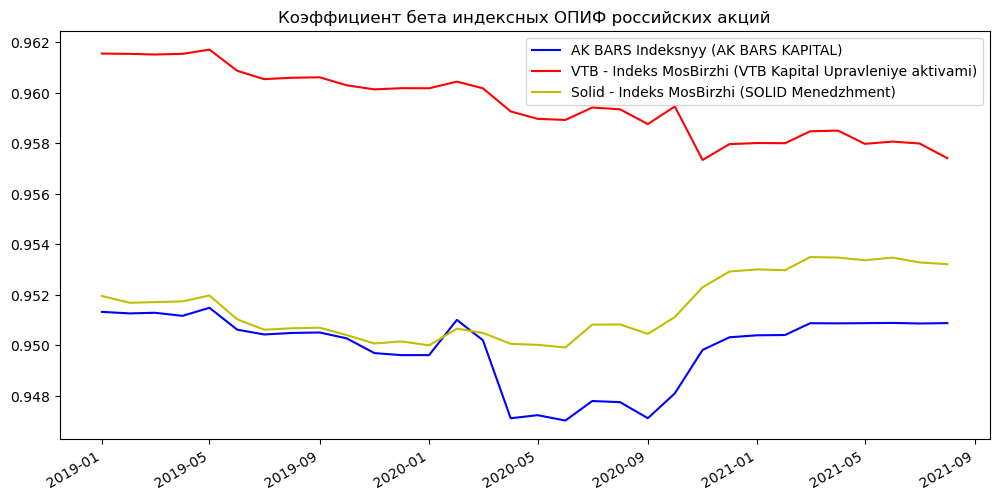

In [61]:
x.index_beta['2019-01':].plot(color=['b', 'r', 'y'], x_compat=True)
plt.legend(lg1[1:])
plt.title('Коэффициент бета индексных ОПИФ российских акций');

In [26]:
x.describe(tickers=False)

,property,period,VTB - Indeks MosBirzhi (VTB Kapital Upravleniye aktivami),AK BARS Indeksnyy (AK BARS KAPITAL),Solid - Indeks MosBirzhi (SOLID Menedzhment),MOEX Total Return,inflation
0,Compound return,YTD,0.252102,0.193208,0.211636,0.238566,0.046919
1,CAGR,1 years,0.404115,0.321435,0.340643,0.404848,0.066927
2,CAGR,5 years,0.207417,0.179378,0.189619,0.217743,0.041708
3,CAGR,10 years,0.140964,0.122846,0.132733,0.155304,0.06295
4,CAGR,"16 years, 3 months",0.150249,0.138672,0.149572,0.166439,0.0754
5,Dividend yield,LTM,0.0,0.0,0.0,0.0,NaN
6,Risk,"16 years, 3 months",0.28818,0.287322,0.285719,0.286483,NaN
7,CVAR,"16 years, 3 months",0.52824,0.527565,0.522302,0.528481,NaN
8,Max drawdowns,"16 years, 3 months",-0.693853,-0.690911,-0.689172,-0.679146,NaN
9,Max drawdowns dates,"16 years, 3 months",2008-11,2008-11,2008-11,2008-11,NaN


In [27]:
x.describe(tickers=False).to_csv('opif2021.csv')

## Сравнение БПИФ и ETF

In [133]:
y = ok.AssetList(etf_full, ccy='RUB', inflation=True)
y

symbols          [MCFTR.INDX, FXRL.MOEX, RUSE.MOEX, SBMX.MOEX, ...
currency                                                       RUB
first date                                                 2020-09
last_date                                                  2021-08
period length                                    1 years, 0 months
inflation                                                 RUB.INFL
dtype: object

In [131]:
y.tickers

['MCFTR', 'FXRL', 'RUSE', 'SBMX', 'VTBX', 'TMOS']

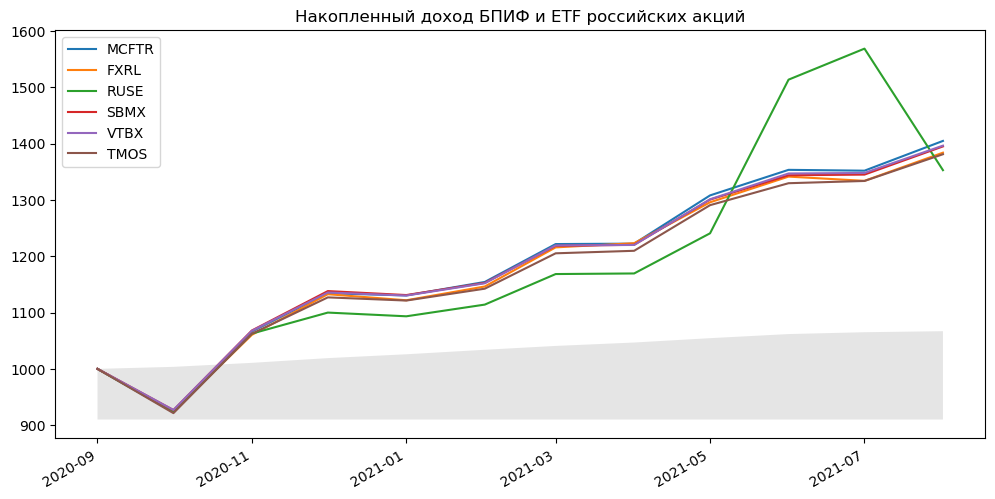

In [134]:
y.wealth_indexes.iloc[:, :-1].plot(x_compat=True)
plt.fill_between(y.wealth_indexes.index.to_timestamp(), 910, y.wealth_indexes['RUB.INFL'], facecolor='grey', alpha=0.2)
plt.legend(y.tickers)
plt.title('Накопленный доход БПИФ и ETF российских акций');

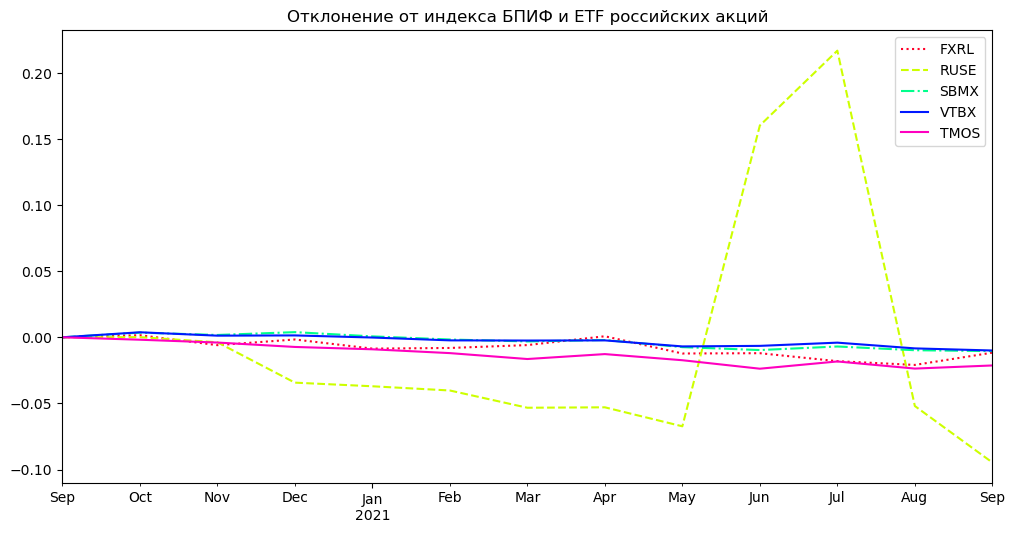

In [111]:
y.tracking_difference.plot(style=[':', '--', '-.', '-'], colormap="gist_rainbow")
plt.legend(y.tickers[1:])
plt.title('Отклонение от индекса БПИФ и ETF российских акций');

In [98]:
df = y.tracking_difference

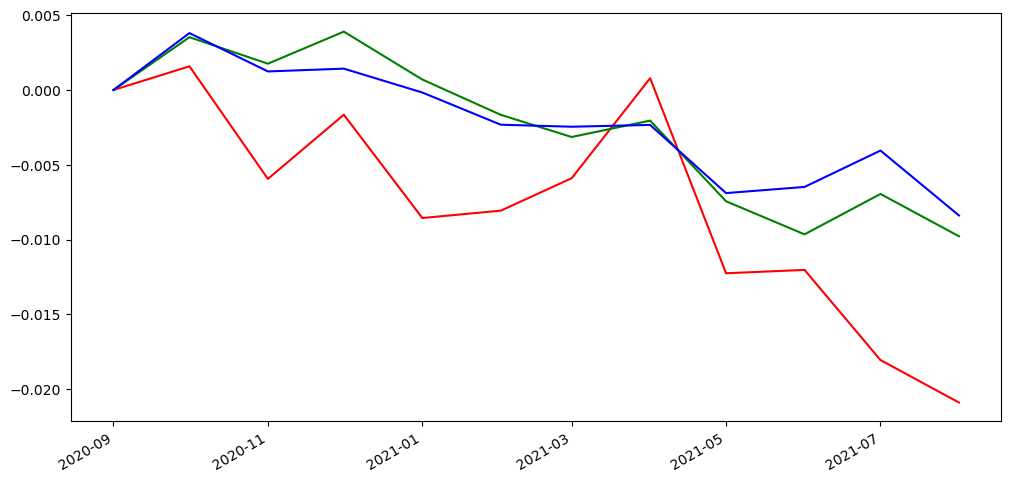

In [100]:
import pandas as pd
with pd.plotting.plot_params.use("x_compat", True):
    df["FXRL.MOEX"].plot(color="r")
    df["SBMX.MOEX"].plot(color="g")
    df["VTBX.MOEX"].plot(color="b")

In [91]:
y.tracking_difference.iloc[-1, :]

FXRL.MOEX   -0.020885
RUSE.MOEX   -0.051972
SBMX.MOEX   -0.009773
VTBX.MOEX   -0.008382
TMOS.MOEX   -0.023650
Name: 2021-08, dtype: float64

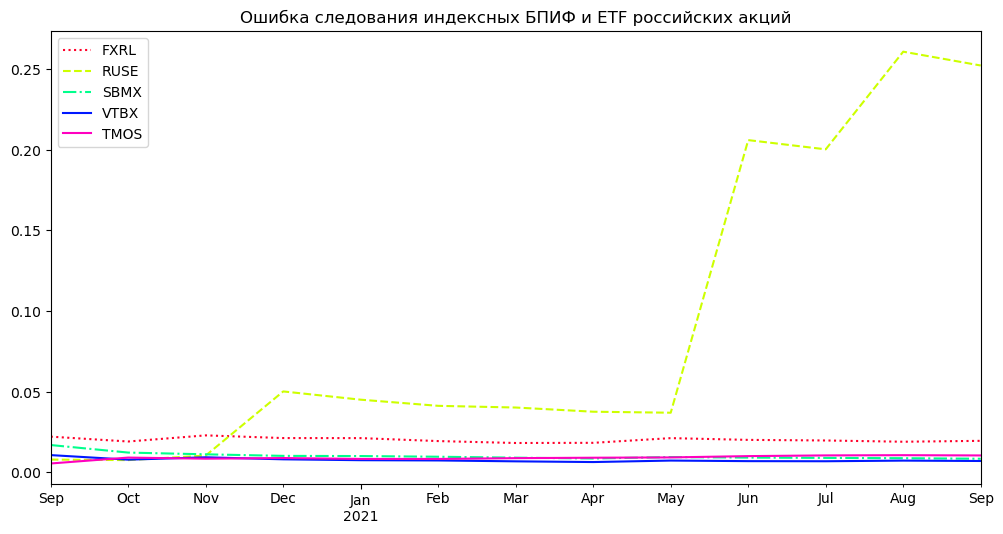

In [113]:
y.tracking_error.plot(style=[':', '--', '-.', '-'], colormap="gist_rainbow")
plt.legend(y.tickers[1:])
plt.title('Ошибка следования индексных БПИФ и ETF российских акций');

In [97]:
y.tracking_error.iloc[-1, :]

FXRL.MOEX    0.019021
RUSE.MOEX    0.260681
SBMX.MOEX    0.008828
VTBX.MOEX    0.007323
TMOS.MOEX    0.010690
Name: 2021-08, dtype: float64

In [ ]:
y.index_beta

,FXRL.MOEX,RUSE.MOEX,SBMX.MOEX,VTBX.MOEX,TMOS.MOEX
2021-09,1.020039,0.309631,1.016385,1.023388,1.013683


In [ ]:
y.describe()

,property,period,FXRL.MOEX,MCFTR.INDX,RUSE.MOEX,SBMX.MOEX,TMOS.MOEX,VTBX.MOEX
0,Compound return,YTD,0.269097,0.280058,0.276415,0.268757,0.268737,0.276723
1,CAGR,1 years,0.456316,0.480635,0.428441,0.465288,0.455728,0.473976
2,CAGR,5 years,NaN,NaN,NaN,NaN,NaN,NaN
3,CAGR,10 years,NaN,NaN,NaN,NaN,NaN,NaN
4,CAGR,"1 years, 1 months",0.397822,0.410857,0.367841,0.403797,0.391027,0.409099
5,Dividend yield,LTM,0,0,0,0,0,0
6,Risk,"1 years, 1 months",0.243838,0.252489,0.429927,0.246857,0.245396,0.245988
7,CVAR,"1 years, 1 months",-0.383963,-0.404848,-0.352876,-0.395075,-0.381198,-0.396466
8,Max drawdowns,"1 years, 1 months",-0.063,-0.0585,-0.1376,-0.0596,-0.0619,-0.0576
9,Max drawdowns dates,"1 years, 1 months",2020-10,2020-10,2021-08,2020-10,2020-10,2020-10


## SBMX VS FXRL (Сбер против FINEX)

In [107]:
z = ok.AssetList(['MCFTR.INDX', 'SBMX.MOEX', 'FXRL.MOEX'], ccy='RUB', inflation=False)
z

symbols          [MCFTR.INDX, SBMX.MOEX, FXRL.MOEX]
currency                                        RUB
first date                                  2018-10
last_date                                   2021-09
period length                     3 years, 0 months
inflation                                      None
dtype: object

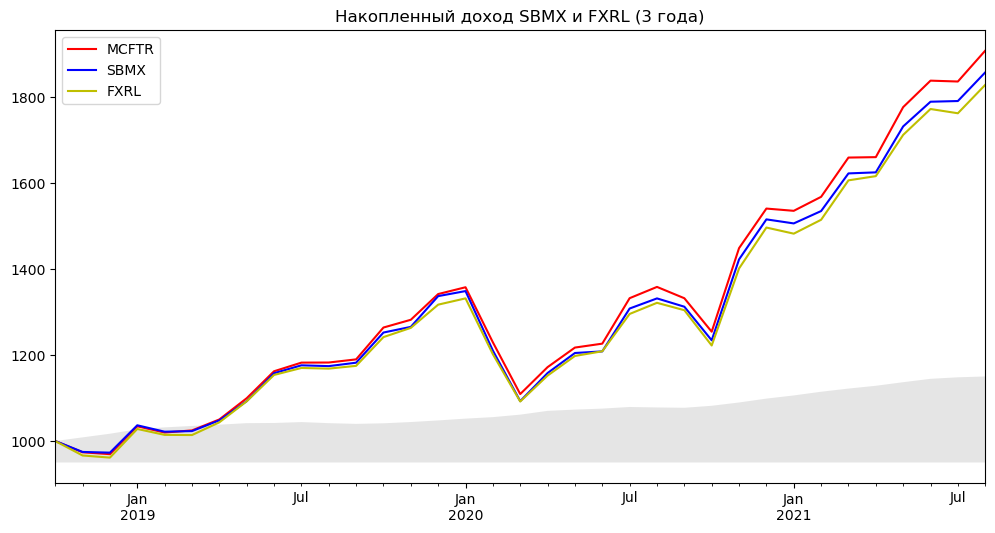

In [106]:
z.wealth_indexes.iloc[:, :-1].plot(color=['r', 'b', 'y']);
plt.fill_between(z.wealth_indexes.index.to_timestamp(), 950, z.wealth_indexes['RUB.INFL'], facecolor='grey', alpha=0.2)
plt.legend(z.tickers)
plt.title('Накопленный доход SBMX и FXRL (3 года)');

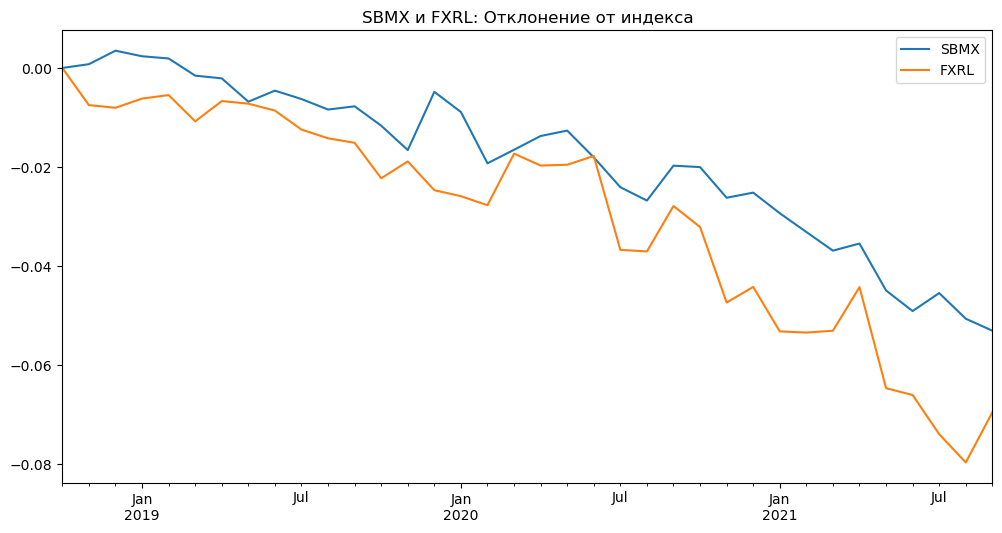

In [115]:
z.tracking_difference.plot()
plt.legend(z.tickers[1:])
plt.title('SBMX и FXRL: Отклонение от индекса');

In [116]:
z.tracking_difference.iloc[-1]

SBMX.MOEX   -0.053050
FXRL.MOEX   -0.069528
Name: 2021-09, dtype: float64

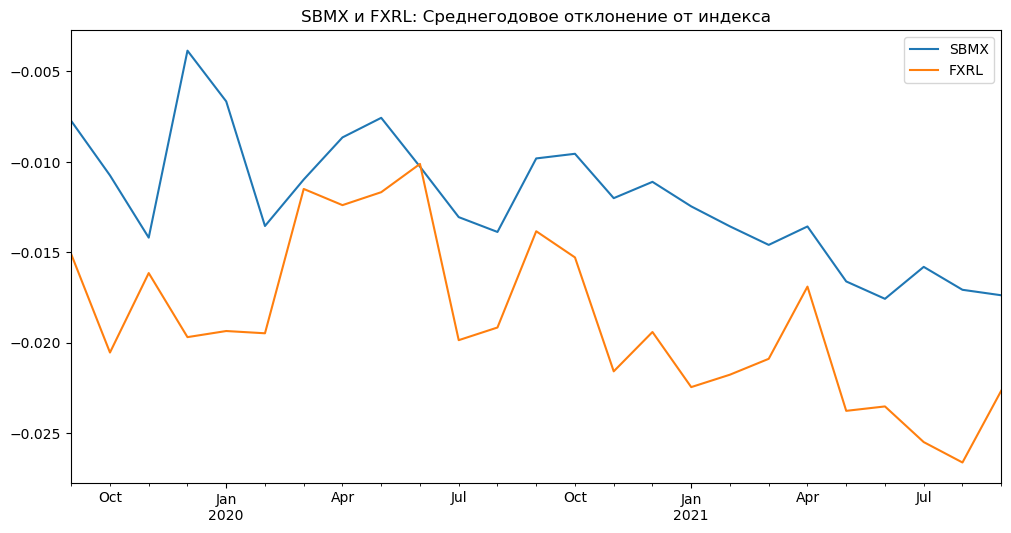

In [117]:
z.tracking_difference_annualized.plot()
plt.legend(z.tickers[1:])
plt.title('SBMX и FXRL: Среднегодовое отклонение от индекса');

In [118]:
z.tracking_difference_annualized.iloc[-1]

SBMX.MOEX   -0.017380
FXRL.MOEX   -0.022659
Name: 2021-09, dtype: float64

In [127]:
z1 = ok.AssetList(['MCFTR.INDX', 'FXRL.MOEX'], ccy='RUB')
z1

symbols          [MCFTR.INDX, FXRL.MOEX]
currency                             RUB
first date                       2016-04
last_date                        2021-08
period length          5 years, 5 months
inflation                       RUB.INFL
dtype: object

In [128]:
z1.tracking_difference_annualized.iloc[-1]

FXRL.MOEX   -0.035013
Name: 2021-08, dtype: float64

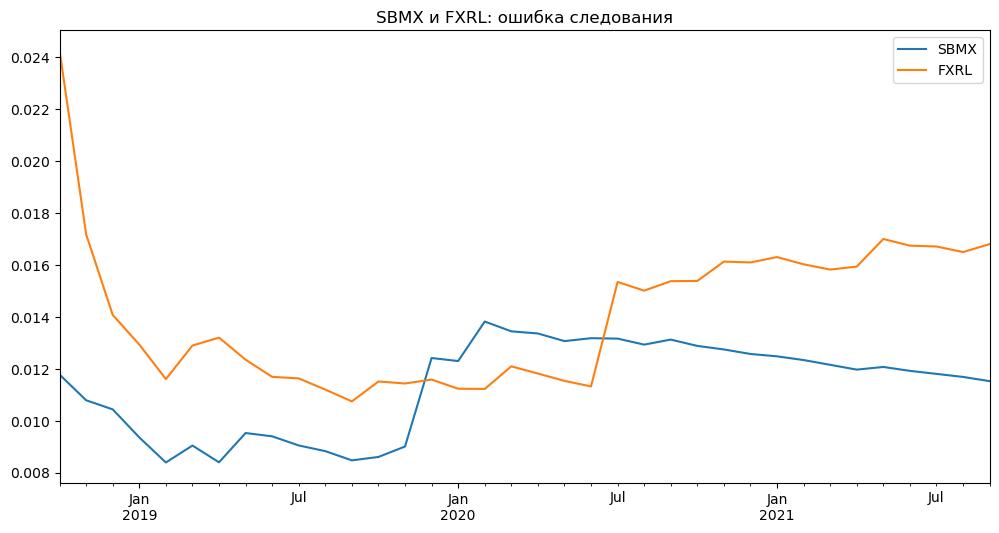

In [120]:
z.tracking_error.plot()
plt.legend(z.tickers[1:])
plt.title('SBMX и FXRL: ошибка следования');

In [121]:
z.tracking_error.iloc[-1]

SBMX.MOEX    0.011526
FXRL.MOEX    0.016802
Name: 2021-09, dtype: float64

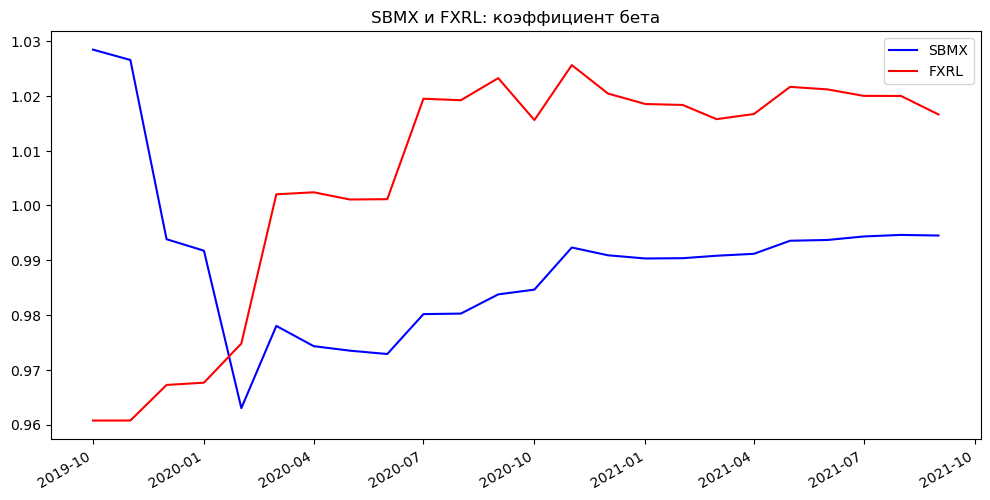

In [124]:
z.index_beta.plot(color=['b', 'r', 'y'], x_compat=True)
plt.legend(z.tickers[1:])
plt.title('SBMX и FXRL: коэффициент бета');